<a href="https://colab.research.google.com/github/Mohammad-Mahdi1999/Multiplication-via-Neural-Network/blob/master/Multiplication_via_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# Generate Dataset

In [67]:
x_1 = np.random.randint(0,10_000,1_000_000)
x_2 = np.random.randint(0,10_000,1_000_000)
y = x_1 * x_2 + 5

In [68]:
df = pd.DataFrame({
    "x_1" : x_1,
    "x_2" : x_2,
    "y" : y,

})

df

,x_1,x_2,y
0,4785,3022,14460275
1,3870,2579,9980735
2,7688,5614,43160437
3,9454,6279,59361671
4,5795,7865,45577680
...,...,...,...
999995,343,2339,802282
999996,4489,4964,22283401
999997,4738,2642,12517801
999998,6568,7915,51985725


## Data ???

In [69]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df.to_numpy()), columns=df.columns)
df_scaled

,x_1,x_2,y
0,-0.072880,-0.686891,-0.477870
1,-0.389927,-0.840366,-0.681086
2,0.933005,0.211095,0.824124
3,1.544922,0.441481,1.559099
4,0.277083,0.990943,0.933783
...,...,...,...
999995,-1.612027,-0.923513,-1.097470
999996,-0.175444,-0.014094,-0.122971
999997,-0.089166,-0.818540,-0.565991
999998,0.544927,1.008265,1.224487


## Data Cleaning

In [70]:
print (f"There are {df_scaled.duplicated().sum()} duplicate records in dataset")

# Drop duplicates

df_scaled.drop_duplicates(inplace = True)
print("Dataset length after droping duplicatets: ", len(df_scaled))

There are 4891 duplicate records in dataset
Dataset length after droping duplicatets:  995109


## Data Splitting

In [71]:
X_train = df_scaled[["x_1","x_2"]][:800000]
Y_train = df_scaled[["y"]][:800000]
X_test = df_scaled[["x_1","x_2"]][800000:]
Y_test = df_scaled[["y"]][800000:]

print(f"Lenght of Train Data: {X_train.shape}")
print(f"Lenght of Test Data: {X_test.shape}")

Lenght of Train Data: (800000, 2)
Lenght of Test Data: (195109, 2)


# Modeling

In [2]:
from keras import layers
from sklearn.metrics import r2_score
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau


## FFN : One Hidden Layer

In [15]:
model = keras.Sequential()
model.add(layers.Dense(64,activation="relu",input_dim=2))
model.add(layers.Dense(1,activation="linear"))

model.summary()

# Compile the Model
model.compile(loss = 'MSE',
              optimizer="adam")

# Callbacks Configs
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

history = model.fit(X_train,Y_train,batch_size=64,epochs=100,validation_split=0.2,callbacks=[earlyStopping, mcp_save, reduce_lr_loss],)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
10000/10000 [==============================] - 22s 2ms/step - loss: 0.0044 - val_loss: 2.0412e-05 - lr: 0.0010
Epoch 2/100
   94/10000 [..............................] - ETA: 16s - loss: 2.0079e-05

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10000/10000 [==============================] - 19s 2ms/step - loss: 1.3595e-05 - val_loss: 9.0292e-06 - lr: 0.0010
Epoch 3/100
10000/10000 [==============================] - 26s 3ms/step - loss: 9.3074e-06 - val_loss: 9.6235e-06 - lr: 0.0010
Epoch 4/100
10000/10000 [==============================] - 30s 3ms/step - loss: 8.7560e-06 - val_loss: 2.0727e-05 - lr: 0.0010
Epoch 5/100
10000/10000 [==============================] - 25s 3ms/step - loss: 8.1364e-06 - val_loss: 5.2009e-06 - lr: 0.0010
Epoch 6/100
10000/10000 [==============================] - 23s 2ms/step - loss: 7.6661e-06 - val_loss: 5.6307e-06 - lr: 0.0010
Epoch 7/100
10000/10000 [==============================] - 22s 2ms/step - loss: 7.4666e-06 - val_loss: 7.2059e-06 - lr: 0.0010
Epoch 8/100
 9980/10000 [============================>.] - ETA: 0s - loss: 7.0876e-06
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
10000/10000 [==============================] - 20s 2ms/step - loss: 7.0852e-06 - val_lo

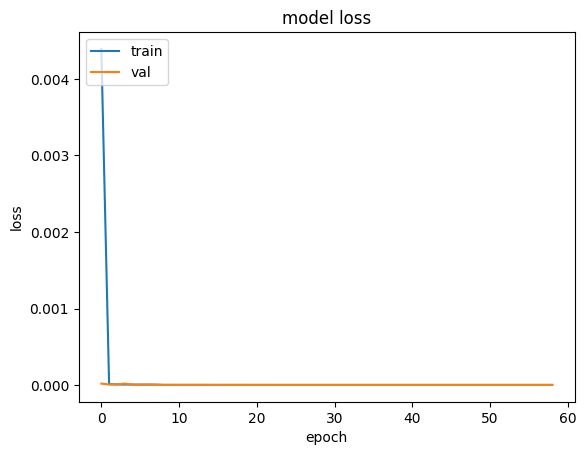

In [16]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

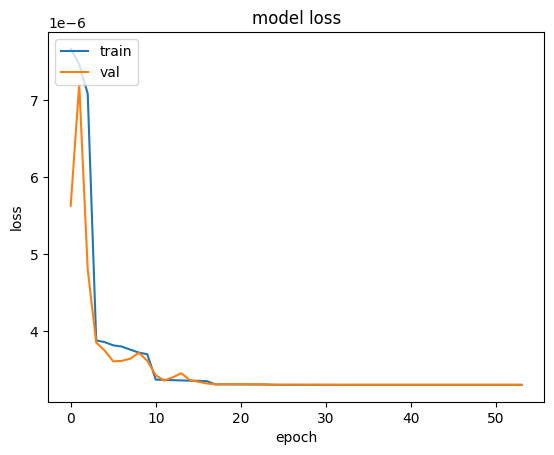

In [17]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'][5:])
plt.plot(history.history['val_loss'][5:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

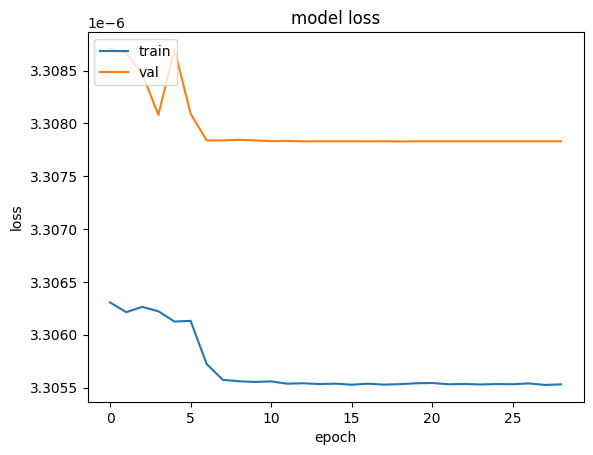

In [18]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'][30:])
plt.plot(history.history['val_loss'][30:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### ٍEvaluate Model

In [ ]:
model.evaluate(X_test,Y_test)

6096/6096 [==============================] - 8s 1ms/step - loss: 3.3287e-06


In [21]:
y_predicted = model.predict(X_test)

6096/6096 [==============================] - 20s 3ms/step


In [24]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

print('MAE: ',mean_absolute_error(Y_test, y_predicted))
print('MSE: ',mean_squared_error(Y_test, y_predicted))
print('R2_score: ',r2_score(Y_test, y_predicted))


MAE:  0.001433238867953178
MSE:  3.328692293360769e-06
R2_score:  0.9999966905483642


### Let's test the model

In [48]:
test_data = X_test.iloc[:1]
print("Data :")
display(test_data)
print("------------------------------------")
print("lable :",)
display(Y_test.iloc[:1])
print("------------------------------------")
predicted = model.predict(test_data)
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = scaler.inverse_transform([[np.nan,np.nan,predicted[0][0]]])
print(f"Model Prediction is : {output[0][2]}")

Data :


,x_1,x_2
803254,1.121071,-1.146622


------------------------------------
lable :


,y
803254,-0.503903


------------------------------------
1/1 [==============================] - 0s 33ms/step
------------------------------------
Model scaled Prediction is : [[-0.5034374]]
Model Prediction is : 13868081.599753588


### Let's test the model via unseen data

In [49]:
num_1 = 8000
num_2 = 3000
unseen_data = scaler.transform([[num_1,num_2,np.nan]])
print("Data :",unseen_data)
print("Label :" )
print("Actual Multiplication :",num_1*num_2 +5)
print("------------------------------------")
predicted = model.predict(unseen_data[:,:2])
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = scaler.inverse_transform([[np.nan,np.nan,predicted[0][0]]])
print(f"Model Prediction is : {output[0][2]}")

Data : [[ 1.04001549 -0.69056813         nan]]
Label :
Actual Multiplication : 24000005
------------------------------------
1/1 [==============================] - 0s 36ms/step
------------------------------------
Model scaled Prediction is : [[-0.04317922]]
Model Prediction is : 24015304.509091616


## FFN : Two Hidden Layer

In [11]:
model = keras.Sequential()
model.add(layers.Dense(64,activation="relu",input_dim=2))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(1,activation="linear"))

model.summary()

# Compile the Model
model.compile(loss = 'MSE',
              optimizer="adam")

# Callbacks Configs
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

history = model.fit(X_train,Y_train,batch_size=64,epochs=100,validation_split=0.2,callbacks=[earlyStopping, mcp_save, reduce_lr_loss],)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                192       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4417 (17.25 KB)
Trainable params: 4417 (17.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
10000/10000 [==============================] - 37s 3ms/step - loss: 0.0017 - val_loss: 2.2257e-05 - lr: 0.0010
Epoch 2/100
   63/10000 [..............................] - ETA: 24s - loss: 1.5908e-05

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


10000/10000 [==============================] - 35s 3ms/step - loss: 2.5534e-05 - val_loss: 4.0732e-06 - lr: 0.0010
Epoch 3/100
10000/10000 [==============================] - 29s 3ms/step - loss: 1.7490e-05 - val_loss: 8.3898e-06 - lr: 0.0010
Epoch 4/100
10000/10000 [==============================] - 32s 3ms/step - loss: 1.5373e-05 - val_loss: 4.8172e-06 - lr: 0.0010
Epoch 5/100
10000/10000 [==============================] - 31s 3ms/step - loss: 1.2696e-05 - val_loss: 5.8235e-06 - lr: 0.0010
Epoch 6/100
10000/10000 [==============================] - 30s 3ms/step - loss: 1.3037e-05 - val_loss: 4.5417e-06 - lr: 0.0010
Epoch 7/100
10000/10000 [==============================] - 32s 3ms/step - loss: 1.0587e-05 - val_loss: 4.4341e-06 - lr: 0.0010
Epoch 8/100
 9981/10000 [============================>.] - ETA: 0s - loss: 1.1161e-05
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
10000/10000 [==============================] - 29s 3ms/step - loss: 1.1148e-05 - val_lo

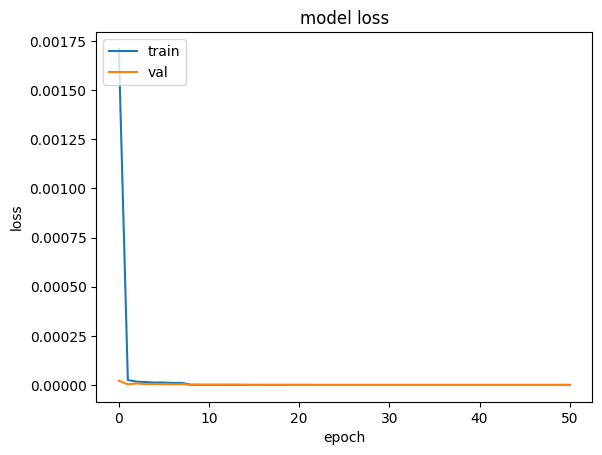

In [12]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'][5:])
plt.plot(history.history['val_loss'][5:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

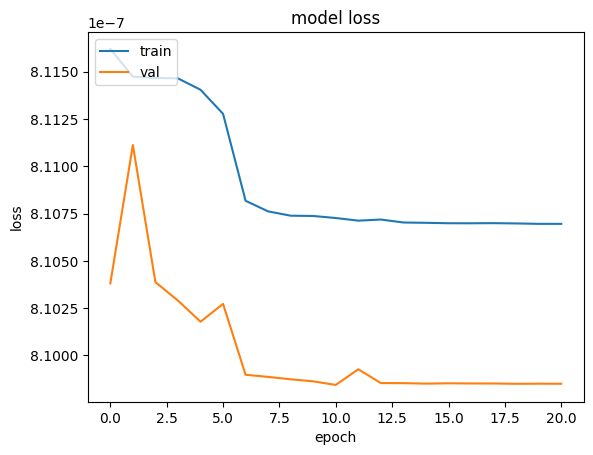

In [14]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'][30:])
plt.plot(history.history['val_loss'][30:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### ٍEvaluate Model

In [15]:
model.evaluate(X_test,Y_test)

6093/6093 [==============================] - 13s 2ms/step - loss: 8.1234e-07


8.123406018967216e-07

In [ ]:
y_predicted = model.predict(X_test)

In [17]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

print('MAE: ',mean_absolute_error(Y_test, y_predicted))
print('MSE: ',mean_squared_error(Y_test, y_predicted))
print('R2_score: ',r2_score(Y_test, y_predicted))


MAE:  0.000706885314877243
MSE:  8.123406824961714e-07
R2_score:  0.9999991873627554


### Let's test the model

In [ ]:
test_data = X_test.iloc[:1]
print("Data :")
display(test_data)
print("------------------------------------")
print("lable :",)
display(Y_test.iloc[:1])
print("------------------------------------")
predicted = model.predict(test_data)
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = scaler.inverse_transform([[np.nan,np.nan,predicted[0][0]]])
print(f"Model Prediction is : {output[0][2]}")

### Let's test the model via unseen data

In [19]:
num_1 = 8000
num_2 = 3000
unseen_data = scaler.transform([[num_1,num_2,np.nan]])
print("Data :",unseen_data)
print("Label :" )
print("Actual Multiplication :",num_1*num_2 +5)
print("------------------------------------")
predicted = model.predict(unseen_data[:,:2])
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = scaler.inverse_transform([[np.nan,np.nan,predicted[0][0]]])
print(f"Model Prediction is : {output[0][2]}")

Data : [[ 1.03774632 -0.69262191         nan]]
Label :
Actual Multiplication : 24000005
------------------------------------
1/1 [==============================] - 0s 57ms/step
------------------------------------
Model scaled Prediction is : [[-0.04481017]]
Model Prediction is : 24023951.601729915
Data : [[ 1.03774632 -0.69262191         nan]]
Label :
Actual Multiplication : 24000005
------------------------------------
1/1 [==============================] - 0s 57ms/step
------------------------------------
Model scaled Prediction is : [[-0.04481017]]
Model Prediction is : 24023951.601729915


In [22]:
num_1 = 4455
num_2 = 5556
unseen_data = scaler.transform([[num_1,num_2,np.nan]])
print("Data :",unseen_data)
print("Label :" )
print("Actual Multiplication :",num_1*num_2 +5)
print("------------------------------------")
predicted = model.predict(unseen_data[:,:2])
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = scaler.inverse_transform([[np.nan,np.nan,predicted[0][0]]])
print(f"Model Prediction is : {output[0][2]}")

Data : [[-0.18925441  0.19237757         nan]]
Label :
Actual Multiplication : 24751985
------------------------------------
1/1 [==============================] - 0s 18ms/step
------------------------------------
Model scaled Prediction is : [[-0.01235055]]
Model Prediction is : 24740506.189390738


In [23]:
num_1 = 50
num_2 = 34
unseen_data = scaler.transform([[num_1,num_2,np.nan]])
print("Data :",unseen_data)
print("Label :" )
print("Actual Multiplication :",num_1*num_2 +5)
print("------------------------------------")
predicted = model.predict(unseen_data[:,:2])
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = scaler.inverse_transform([[np.nan,np.nan,predicted[0][0]]])
print(f"Model Prediction is : {output[0][2]}")

Data : [[-1.71391962 -1.7195814          nan]]
Label :
Actual Multiplication : 1705
------------------------------------
1/1 [==============================] - 0s 18ms/step
------------------------------------
Model scaled Prediction is : [[-1.1391819]]
Model Prediction is : -134592.9642238319


## CNN : 1D

In [ ]:
from keras.optimizers import RMSprop

model = keras.Sequential()
model.add(layers.Dense(64,activation="relu",input_dim=2))
model.add(layers.Dense(1,activation="linear"))

model.summary()

# Compile the Model
model.compile(loss = 'MSE',
              optimizer=RMSprop(learning_rate=0.000000001))

# Callbacks Configs
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

history = model.fit(X_train,Y_train,batch_size=64,epochs=100,validation_split=0.2,callbacks=[earlyStopping, mcp_save, reduce_lr_loss],)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 64)                192       
                                                                 
 dense_26 (Dense)            (None, 1)                 65        
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
 6184/10000 [=================>............] - ETA: 8s - loss: nan

KeyboardInterrupt: 

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'][5:])
plt.plot(history.history['val_loss'][5:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'][30:])
plt.plot(history.history['val_loss'][30:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### ٍEvaluate Model

In [ ]:
model.evaluate(X_test,Y_test)

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

print('MAE: ',mean_absolute_error(Y_test, y_predicted))
print('MSE: ',mean_squared_error(Y_test, y_predicted))
print('R2_score: ',r2_score(Y_test, y_predicted))


### Let's test the model

In [ ]:
test_data = X_test.iloc[:1]
print("Data :")
display(test_data)
print("------------------------------------")
print("lable :",)
display(Y_test.iloc[:1])
print("------------------------------------")
predicted = model.predict(test_data)
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = scaler.inverse_transform([[np.nan,np.nan,predicted[0][0]]])
print(f"Model Prediction is : {output[0][2]}")

### Let's test the model via unseen data

In [ ]:
num_1 = 8000
num_2 = 3000
unseen_data = scaler.transform([[num_1,num_2,np.nan]])
print("Data :",unseen_data)
print("Label :" )
print("Actual Multiplication :",num_1*num_2 +5)
print("------------------------------------")
predicted = model.predict(unseen_data[:,:2])
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = scaler.inverse_transform([[np.nan,np.nan,predicted[0][0]]])
print(f"Model Prediction is : {output[0][2]}")

## RNN : LSTM

In [75]:
model = keras.Sequential()

model.add(layers.LSTM(4, return_sequences=True, return_state=False,input_dim=2))
model.add(layers.Dense(1,activation="linear"))

model.summary()

# Compile the Model
model.compile(loss = 'MSE',
              optimizer="adam")

# Callbacks Configs
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

history = model.fit(X_train,Y_train,batch_size=64,epochs=100,validation_split=0.2,callbacks=[earlyStopping, mcp_save, reduce_lr_loss],)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, None, 4)           112       
                                                                 
 dense_28 (Dense)            (None, None, 1)           5         
                                                                 
Total params: 117 (468.00 Byte)
Trainable params: 117 (468.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_24' (type Sequential).
    
    Input 0 of layer "lstm_3" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (64, 2)
    
    Call arguments received by layer 'sequential_24' (type Sequential):
      • inputs=tf.Tensor(shape=(64, 2), dtype=float64)
      • training=True
      • mask=None


In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'][5:])
plt.plot(history.history['val_loss'][5:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'][30:])
plt.plot(history.history['val_loss'][30:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### ٍEvaluate Model

In [ ]:
model.evaluate(X_test,Y_test)

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

print('MAE: ',mean_absolute_error(Y_test, y_predicted))
print('MSE: ',mean_squared_error(Y_test, y_predicted))
print('R2_score: ',r2_score(Y_test, y_predicted))


### Let's test the model

In [ ]:
test_data = X_test.iloc[:1]
print("Data :")
display(test_data)
print("------------------------------------")
print("lable :",)
display(Y_test.iloc[:1])
print("------------------------------------")
predicted = model.predict(test_data)
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = scaler.inverse_transform([[np.nan,np.nan,predicted[0][0]]])
print(f"Model Prediction is : {output[0][2]}")

### Let's test the model via unseen data

In [ ]:
num_1 = 8000
num_2 = 3000
unseen_data = scaler.transform([[num_1,num_2,np.nan]])
print("Data :",unseen_data)
print("Label :" )
print("Actual Multiplication :",num_1*num_2 +5)
print("------------------------------------")
predicted = model.predict(unseen_data[:,:2])
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = scaler.inverse_transform([[np.nan,np.nan,predicted[0][0]]])
print(f"Model Prediction is : {output[0][2]}")

# Data ??? via Log

In [55]:
def log_normalize(f):
    return np.log10(f)

def inverse_log_normalize(f):
    return np.pow(f,10)

df_scaled = pd.DataFrame(log_normalize(df.to_numpy()), columns=df.columns)
df_scaled

<ipython-input-55-e0ab853d1d0e>:2: RuntimeWarning: divide by zero encountered in log10
  return np.log10(f)


,x_1,x_2,y
0,3.584444,3.465383,7.049827
1,3.458336,3.881499,7.339835
2,3.396548,3.747023,7.143571
3,2.787460,3.197281,5.984743
4,3.605628,3.919758,7.525386
...,...,...,...
999995,3.432007,3.992730,7.424737
999996,3.802842,3.707740,7.510583
999997,3.554489,3.850095,7.404584
999998,3.625107,3.127753,6.752859


## Data Cleaning

In [56]:
print (f"There are {df_scaled.duplicated().sum()} duplicate records in dataset")

# Drop duplicates

df_scaled.drop_duplicates(inplace = True)
print("Dataset length after droping duplicatets: ", len(df_scaled))

There are 5032 duplicate records in dataset
Dataset length after droping duplicatets:  994968


## Data Splitting

In [57]:
X_train = df_scaled[["x_1","x_2"]][:800000]
Y_train = df_scaled[["y"]][:800000]
X_test = df_scaled[["x_1","x_2"]][800000:]
Y_test = df_scaled[["y"]][800000:]

print(f"Lenght of Train Data: {X_train.shape}")
print(f"Lenght of Test Data: {X_test.shape}")

Lenght of Train Data: (800000, 2)
Lenght of Test Data: (194968, 2)


## Modeling

## FFN : One Hidden Layer

In [66]:
from keras.optimizers import RMSprop

model = keras.Sequential()
model.add(layers.Dense(64,activation="relu",input_dim=2))
model.add(layers.Dense(1,activation="linear"))

model.summary()

# Compile the Model
model.compile(loss = 'MSE',
              optimizer=RMSprop(learning_rate=0.000000001))

# Callbacks Configs
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')

history = model.fit(X_train,Y_train,batch_size=64,epochs=100,validation_split=0.2,callbacks=[earlyStopping, mcp_save, reduce_lr_loss],)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 64)                192       
                                                                 
 dense_26 (Dense)            (None, 1)                 65        
                                                                 
Total params: 257 (1.00 KB)
Trainable params: 257 (1.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/100
 6184/10000 [=================>............] - ETA: 8s - loss: nan

KeyboardInterrupt: 

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'][5:])
plt.plot(history.history['val_loss'][5:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'][30:])
plt.plot(history.history['val_loss'][30:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### ٍEvaluate Model

In [ ]:
model.evaluate(X_test,Y_test)

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

print('MAE: ',mean_absolute_error(Y_test, y_predicted))
print('MSE: ',mean_squared_error(Y_test, y_predicted))
print('R2_score: ',r2_score(Y_test, y_predicted))


### Let's test the model

In [ ]:
test_data = X_test.iloc[:1]
print("Data :")
display(test_data)
print("------------------------------------")
print("lable :",)
display(Y_test.iloc[:1])
print("------------------------------------")
predicted = model.predict(test_data)
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = scaler.inverse_transform([[np.nan,np.nan,predicted[0][0]]])
print(f"Model Prediction is : {output[0][2]}")

### Let's test the model via unseen data

In [ ]:
num_1 = 8000
num_2 = 3000
unseen_data = scaler.transform([[num_1,num_2,np.nan]])
print("Data :",unseen_data)
print("Label :" )
print("Actual Multiplication :",num_1*num_2 +5)
print("------------------------------------")
predicted = model.predict(unseen_data[:,:2])
print("------------------------------------")
print(f"Model scaled Prediction is : {predicted}")
output = scaler.inverse_transform([[np.nan,np.nan,predicted[0][0]]])
print(f"Model Prediction is : {output[0][2]}")